# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "e1da62d5ad0815c57d54a42eedfd271b"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={url}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | revda
Processing Record 3 of Set 1 | abrantes
Processing Record 4 of Set 1 | holualoa
Processing Record 5 of Set 1 | nema
Processing Record 6 of Set 1 | mora
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | eduardo castex
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | malvan
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | monitos
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tonder
Processing Record 22 of Set 1 | zeya
Processing Record 23 of Set 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,87,100,2.24,NZ,1727811278
1,revda,56.8010,59.9303,2.48,69,0,1.28,RU,1727811279
2,abrantes,39.4667,-8.2000,21.18,73,100,2.24,PT,1727811155
3,holualoa,19.6228,-155.9522,27.53,65,0,2.57,US,1727811281
4,nema,57.5067,50.5011,3.73,54,0,2.75,RU,1727811282


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,87,100,2.24,NZ,1727811278
1,revda,56.8010,59.9303,2.48,69,0,1.28,RU,1727811279
2,abrantes,39.4667,-8.2000,21.18,73,100,2.24,PT,1727811155
3,holualoa,19.6228,-155.9522,27.53,65,0,2.57,US,1727811281
4,nema,57.5067,50.5011,3.73,54,0,2.75,RU,1727811282


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

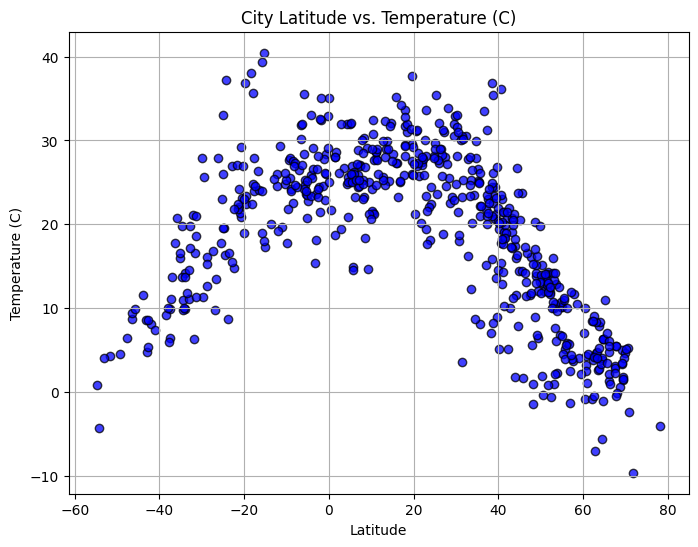

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="b", edgecolors="k", alpha=0.75)
plt.title("City Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

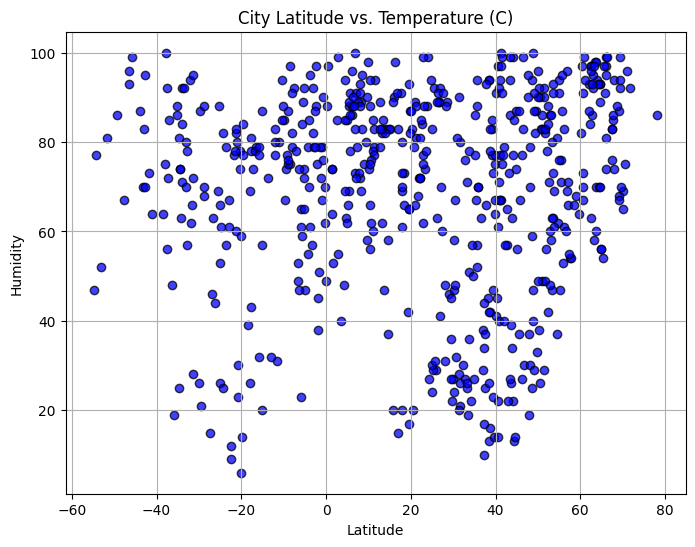

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="b", edgecolors="k", alpha=0.75)
plt.title("City Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

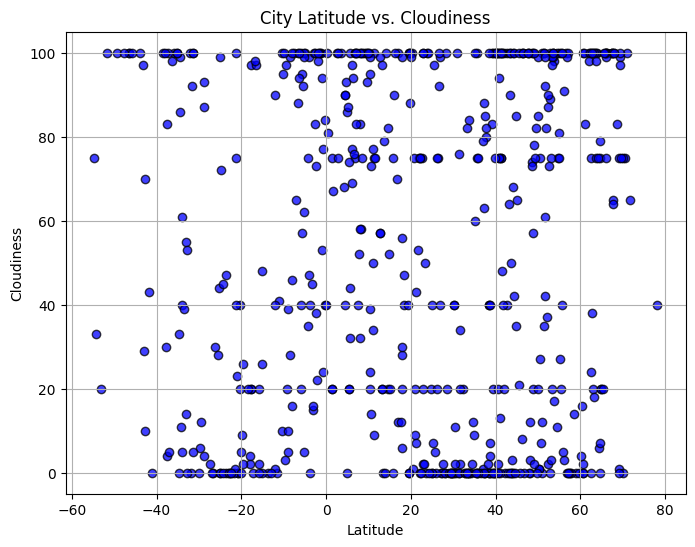

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="b", edgecolors="k", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

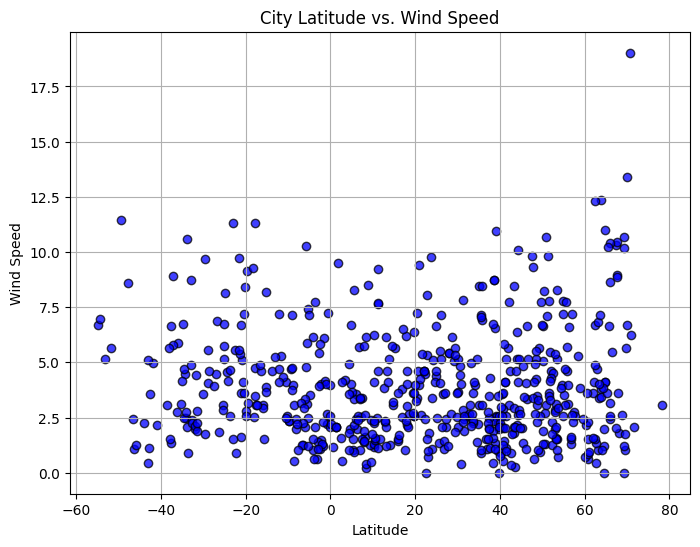

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="b", edgecolors="k", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:

# Function to perform linear regression and plot the results
def plot_linear_regression(x_values, y_values, hemisphere, var_name, var_units):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create regression line values
    reg_line = slope * x_values + intercept
    
    # Plot scatter plot with regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, edgecolors="k", alpha=0.75, label="Data Points")
    plt.plot(x_values, reg_line, color="red", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")
    
    # Add title, labels, and r-squared value
    plt.title(f"{hemisphere} Hemisphere: Latitude vs {var_name}")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var_name} ({var_units})")
    plt.legend(loc="best")
    plt.grid(True)
    
    # Display the r-squared value in the plot
    plt.annotate(f"R² = {round(r_value**2, 2)}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color="red")
    
    # Save the plot
    plt.savefig(f"{hemisphere}_Hemisphere_Latitude_vs_{var_name}.png")
    plt.show()


In [20]:
northern_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,revda,56.8010,59.9303,2.48,69,0,1.28,RU,1727811279
2,abrantes,39.4667,-8.2000,21.18,73,100,2.24,PT,1727811155
3,holualoa,19.6228,-155.9522,27.53,65,0,2.57,US,1727811281
4,nema,57.5067,50.5011,3.73,54,0,2.75,RU,1727811282
5,mora,11.0461,14.1401,27.73,60,50,2.47,CM,1727811283


In [21]:
southern_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,87,100,2.24,NZ,1727811278
6,fale old settlement,-9.3852,-171.2468,27.65,74,97,4.72,TK,1727811284
7,port-aux-francais,-49.3500,70.2167,4.52,86,100,11.46,TF,1727811285
9,eduardo castex,-35.9150,-64.2945,20.77,19,100,5.88,AR,1727811287
15,puerto natales,-51.7236,-72.4875,4.25,81,100,5.66,CL,1727811293


###  Temperature vs. Latitude Linear Regression Plot

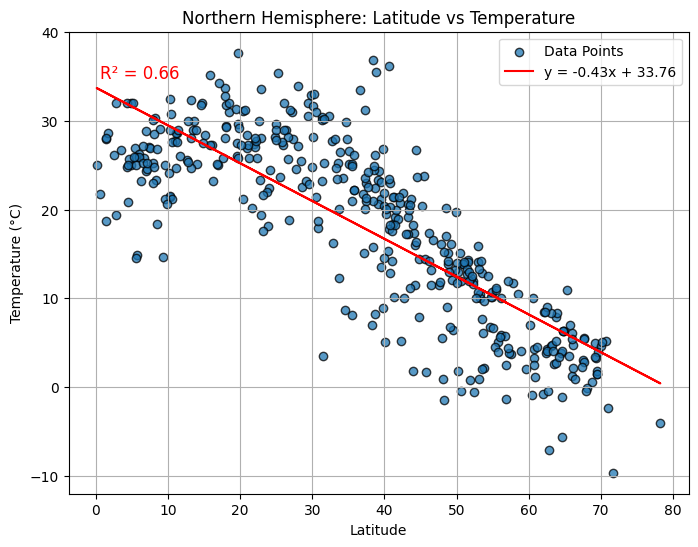

In [23]:
plot_linear_regression(northern_df["Lat"], northern_df["Max Temp"], "Northern", "Temperature", "°C")


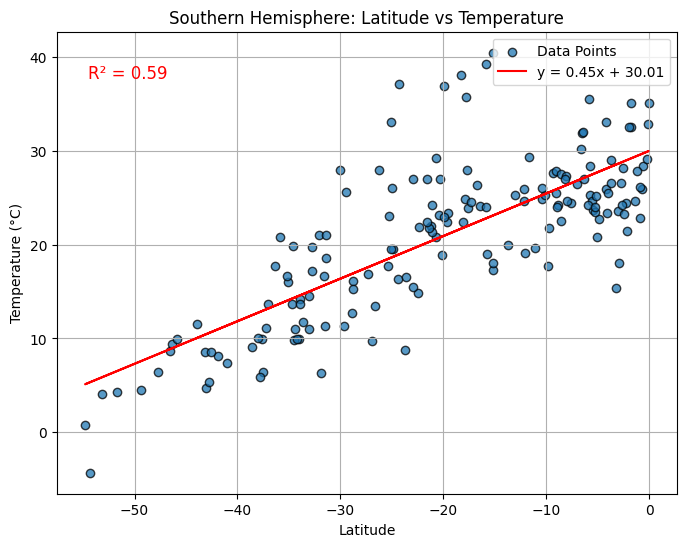

In [24]:
plot_linear_regression(southern_df["Lat"], southern_df["Max Temp"], "Southern", "Temperature", "°C")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In North hemisphere with the incearse in latitude the temperature is gradually decease. There is a stronly negative linear relationship.
In South hemisphere with the incearse in latitude the temperature is gradually increase. There is a stronly positive linear relationship.

### Humidity vs. Latitude Linear Regression Plot

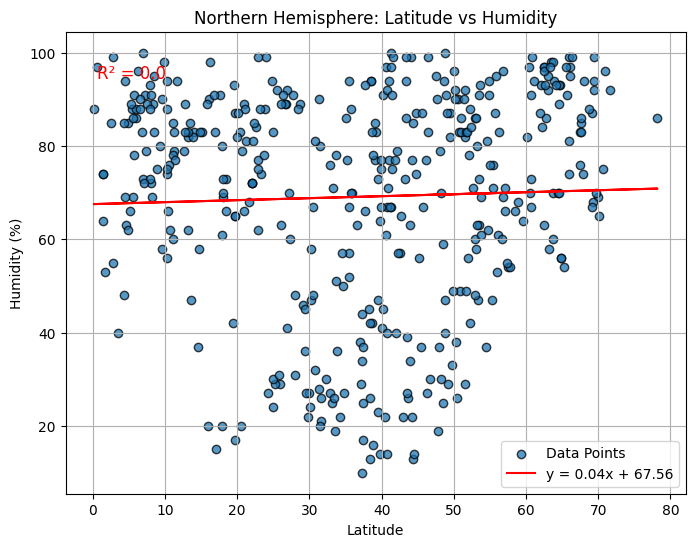

In [31]:
plot_linear_regression(northern_df["Lat"], northern_df["Humidity"], "Northern", "Humidity", "%")


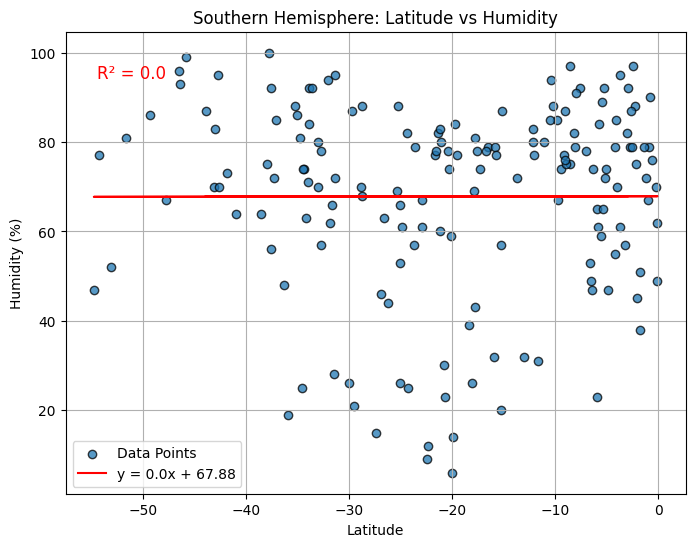

In [32]:
plot_linear_regression(southern_df["Lat"], southern_df["Humidity"], "Southern", "Humidity", "%")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no relationship between the latitude and humidity in both north and south hemishpere.

### Cloudiness vs. Latitude Linear Regression Plot

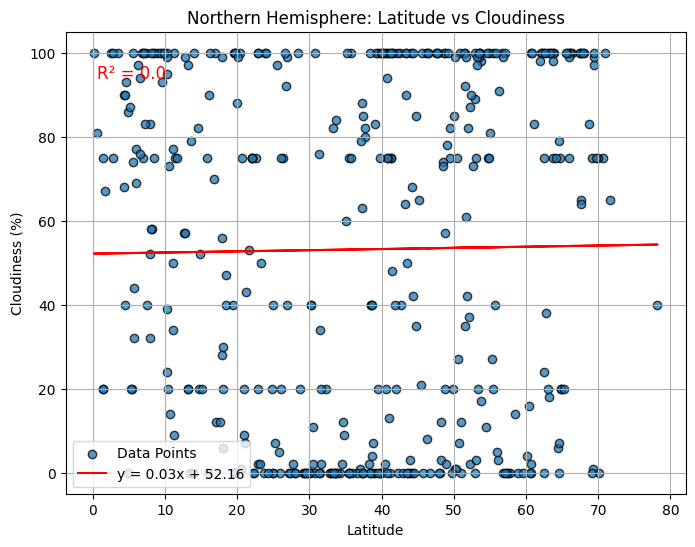

In [27]:
plot_linear_regression(northern_df["Lat"], northern_df["Cloudiness"], "Northern", "Cloudiness", "%")

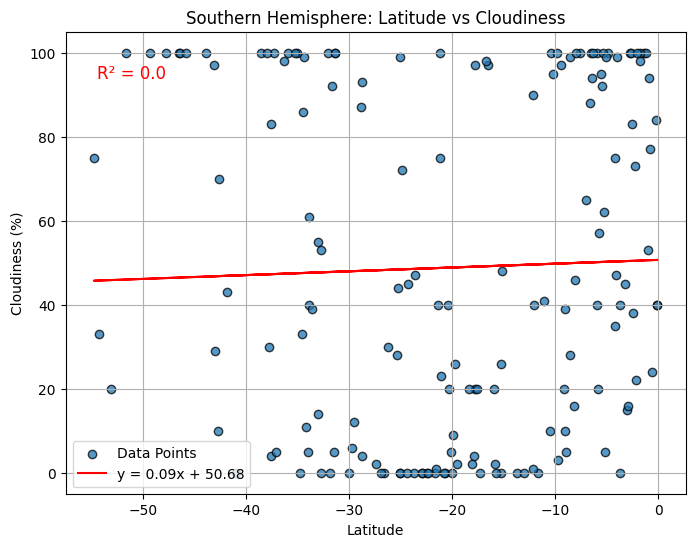

In [28]:
plot_linear_regression(southern_df["Lat"], southern_df["Cloudiness"], "Southern", "Cloudiness", "%")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no relationship between the latitude and cloudiness in both north and south hemishpere.

### Wind Speed vs. Latitude Linear Regression Plot

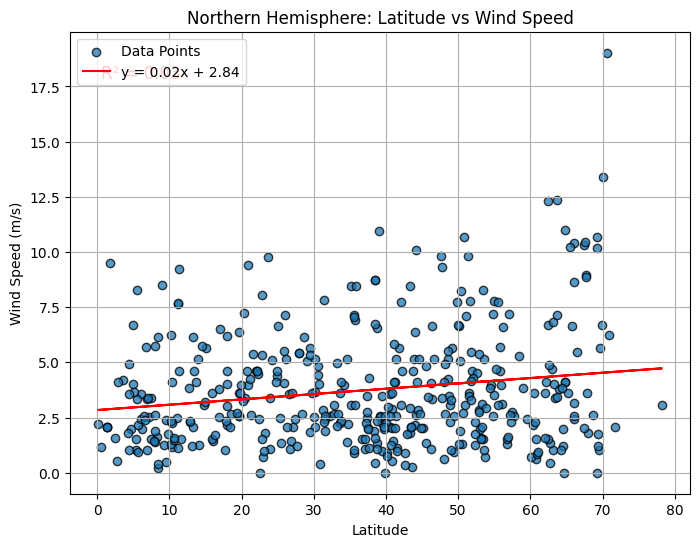

In [29]:
plot_linear_regression(northern_df["Lat"], northern_df["Wind Speed"], "Northern", "Wind Speed", "m/s")

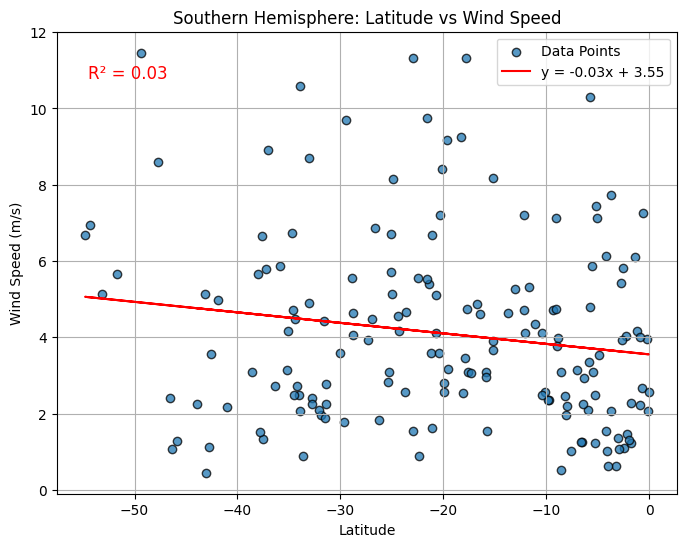

In [30]:
plot_linear_regression(southern_df["Lat"], southern_df["Wind Speed"], "Southern", "Wind Speed", "m/s")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In North hemisphere with the incearse in latitude the wind speed is gradually incease. There is a  positive linear relationship.
In South hemisphere with the incearse in latitude the wind speed is gradually decease. There is a  negative linear relationship.